__We have the min and max temperatures in a city In India for each months of the year.
We would like to find a function to describe this and show it graphically, the dataset
given below.\
Task:\
1.fitting it to the periodic function\
2.plot the fit__

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
Max_temp = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
Min_temp = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

<function matplotlib.pyplot.show(*args, **kw)>

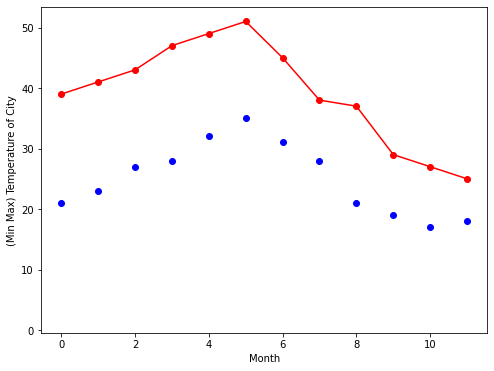

In [3]:
fig = plt.figure(figsize=(8,6))
months = np.arange(12)
plt.plot(months,Max_temp,'ro-',2)
plt.plot(months,Min_temp,'bo')
plt.xlabel("Month")
plt.ylabel("(Min Max) Temperature of City")
plt.show

In [4]:
from scipy import optimize

def temperature(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(temperature, months, Max_temp, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(temperature, months, Min_temp, [-40, 20, 0])


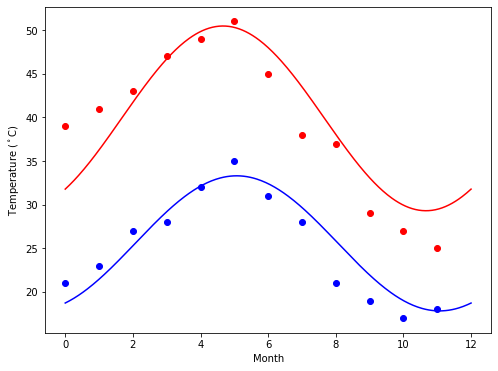

In [5]:
days = np.linspace(0, 12, num=365)

plt.figure(figsize=(8,6))
plt.plot(months, Max_temp, 'ro')
plt.plot(days, temperature(days, *res_max), 'r-')
plt.plot(months, Min_temp, 'bo')
plt.plot(days, temperature(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

__Charts to plot__
1. Create a pie chart presenting the male/female proportion
2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [6]:
url = 'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'
titanic = pd.read_csv(url)
titanic.head()

<IPython.core.display.Javascript object>

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [7]:
genders = titanic['sex'].astype('category')
genders = genders.cat.codes
genders

0       0
1       1
2       0
3       1
4       0
       ..
1305    0
1306    1
1307    1
1308    1
1309   -1
Length: 1310, dtype: int8

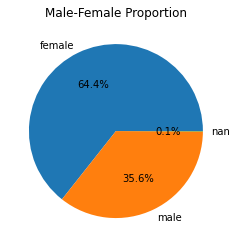

In [8]:
plt.pie(genders.value_counts(), labels = titanic['sex'].unique(), autopct='%1.1f%%')
plt.title('Male-Female Proportion')
plt.show()

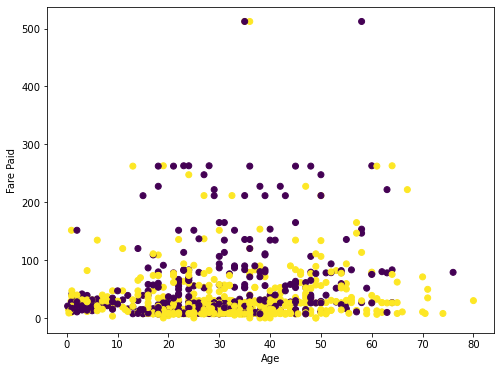

In [9]:
plt.figure(figsize=(8,6))
plt.scatter(titanic['age'], titanic['fare'], c = genders)
plt.xlabel("Age")
plt.ylabel("Fare Paid")
plt.show()